In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [5]:
file_path = "C:/Users/Mohammed Riyan H/OneDrive/Desktop/Projects/Satellite_Stability/real_time_satellite_data_with_edge_cases.csv"
data = pd.read_csv(file_path)

In [6]:
data.head()

,Time,Latitude,Longitude,Altitude,Orientation
0,0,12.971600,77.5947,1000.000000,-2.779696
1,1,12.971601,77.5947,1010.836343,-2.104895
2,2,12.971602,77.5947,1021.672687,4.506128
3,3,12.971603,77.5947,1032.509030,-4.261908
4,4,12.971603,77.5947,1043.345374,2.139876


In [7]:
rf_classifier = RandomForestClassifier(n_estimators = 100 , random_state = 42)

In [9]:
Z = data['Altitude']

Core Of This Model

In [10]:
def Atmospheric_layer(Z):
    def classify_layer(altitude):
        if altitude < 0 :
            return "Below The Earth's Surface"
        elif altitude == 0:
            return "Surface Of The Earth"
        elif altitude <= 12000:
            return "Troposphere"
        elif altitude <= 50000:
            return "Stratosphere"
        elif altitude <= 80000:
            return "Mesosphere"
        elif altitude <=700000:
            return "Thermosphere"
        elif altitude <= 10000000:
            return "Exosphere"
        else:
            return "Beyond Earth's Atmosphere"
    return [classify_layer(alt) for alt in Z]

In [13]:
data['Atmospheric Layer'] = Atmospheric_layer(Z)
data.to_csv("Atmosphere_Classified_Data.csv")
print("Classification of Atmospheric Layer Is Completed")

Classification of Atmospheric Layer Is Completed


In [15]:
X = data[['Altitude']]
Y = data['Atmospheric Layer']

In [16]:
X_Train,X_Test , Y_Train , Y_Test = train_test_split(X,Y,test_size = .2 ,random_state = 42)

In [17]:
rf_classifier = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf_classifier.fit(X_Train, Y_Train)

RandomForestClassifier(random_state=42)

In [18]:
Y_Pred = rf_classifier.predict(X_Test)

In [19]:
accuracy = accuracy_score(Y_Test,Y_Pred)
print(f"Accuracy : {accuracy *100:2f}%")

Accuracy : 100.000000%


In [20]:
print("\nClassification Report:")
print(classification_report(Y_Test,Y_Pred))


Classification Report:
              precision    recall  f1-score   support

Stratosphere       1.00      1.00      1.00      1051
 Troposphere       1.00      1.00      1.00       389

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



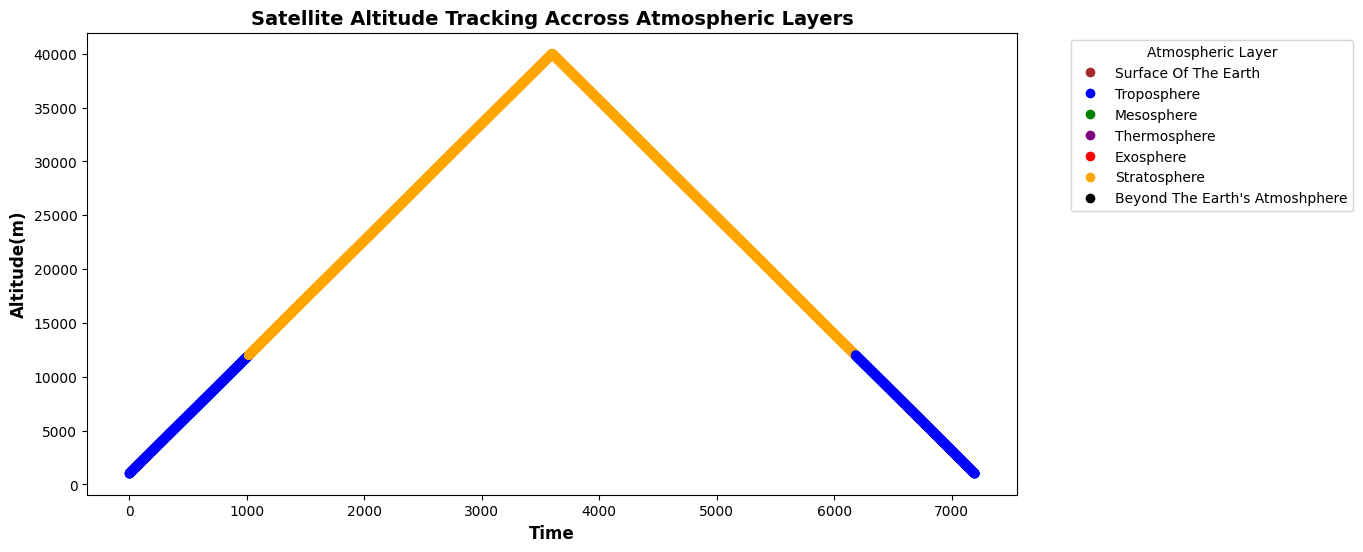

In [23]:
layers_colors = {
    "Surface Of The Earth":"brown",
    "Troposphere" : "blue",
    "Mesosphere":"green",
    "Thermosphere" :"purple",
    "Exosphere" : "red",
    "Stratosphere":"orange",
    "Beyond The Earth's Atmoshphere" : "black"
}
colors = [layers_colors[layer]for layer in data['Atmospheric Layer']]
plt.figure(figsize=(12,6))
plt.scatter(data.index,data["Altitude"],c=colors,label = "Altitude Path",alpha = .8)

plt.xlabel("Time",fontsize = 12 , fontweight = "bold")
plt.ylabel("Altitude(m)",fontsize = 12 , fontweight = "bold")
plt.title("Satellite Altitude Tracking Accross Atmospheric Layers",fontsize = 14 , fontweight = "bold")

legend_labels = list(layers_colors.keys())
legend_patches = [plt.Line2D([0],[0],marker = "o",color ="w",markerfacecolor=layers_colors[layer],markersize = 8)for layer in legend_labels]
plt.legend(legend_patches , legend_labels,title = "Atmospheric Layer",bbox_to_anchor = (1.05,1),loc = "upper left")
plt.show()

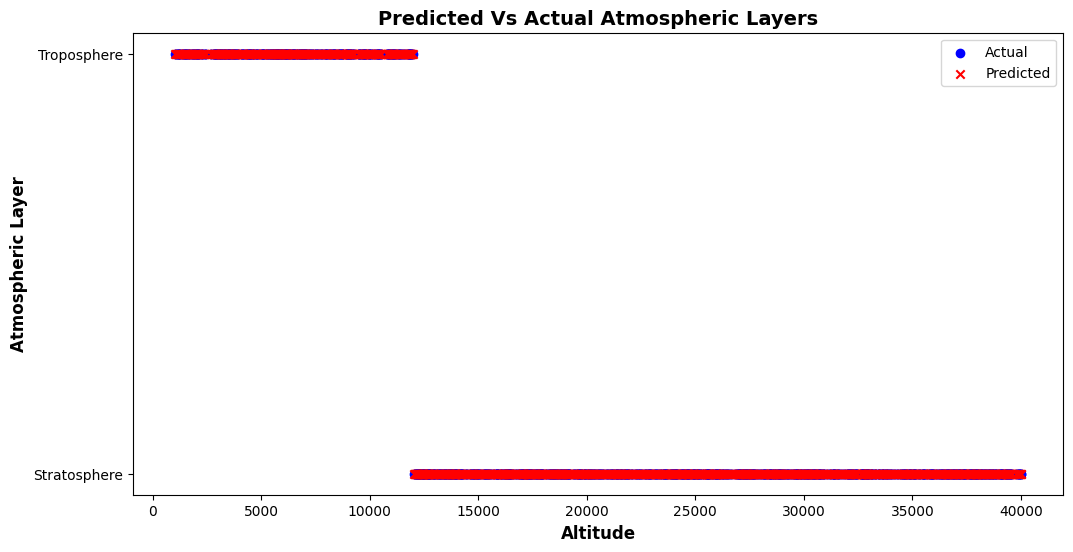

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(X_Test,Y_Test,color = 'blue',label = 'Actual')
plt.scatter(X_Test,Y_Pred,color = 'red',label = 'Predicted',marker = 'x')
plt.xlabel("Altitude",fontsize = 12 , fontweight = 'bold')
plt.ylabel("Atmospheric Layer",fontsize = 12 , fontweight ='bold')
plt.title("Predicted Vs Actual Atmospheric Layers",fontsize=14,fontweight = "bold")
plt.legend()
plt.show()